### Importing Libraries

In [296]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [297]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission_format = pd.read_csv('Sample_submission.csv')

### Viewing Different Datasets

In [298]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [299]:
df.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [300]:
test.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [301]:
test.describe()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0
mean,235.500000,37.010638,9.293617,2.914894,1033.929787,2.708511,2.736170,2.693617,6584.874468,2.670213,...,3.155319,0.800000,11.387234,2.710638,7.070213,4.238298,2.263830,4.261702,3.051064,1.0
std,135.821574,9.166425,8.084506,1.016491,593.994868,1.089850,0.729057,1.138473,4758.485182,2.516421,...,0.362595,0.855435,7.817961,1.261744,5.900505,3.462042,3.272058,3.501693,1.413289,0.0
min,1.000000,18.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1091.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,118.250000,31.000000,2.000000,2.000000,491.500000,2.000000,2.000000,2.000000,2964.750000,1.000000,...,3.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,1.0
50%,235.500000,35.000000,7.000000,3.000000,1042.000000,3.000000,3.000000,3.000000,5038.000000,1.000000,...,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000,1.0
75%,352.750000,43.000000,15.000000,4.000000,1537.750000,4.000000,3.000000,4.000000,8362.250000,4.000000,...,3.000000,1.000000,15.000000,3.000000,10.000000,7.000000,3.000000,7.000000,4.000000,1.0
max,470.000000,60.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,4.000000,19943.000000,9.000000,...,4.000000,3.000000,40.000000,6.000000,40.000000,17.000000,15.000000,17.000000,5.000000,1.0


In [302]:
submission_format.head()

,Id,Attrition
0,1,0.742476
1,2,0.347438
2,3,0.938753
3,4,0.456471
4,5,0.363193


### EDA and Graphs

#### Department-wise, Education field VS Employee Attrition

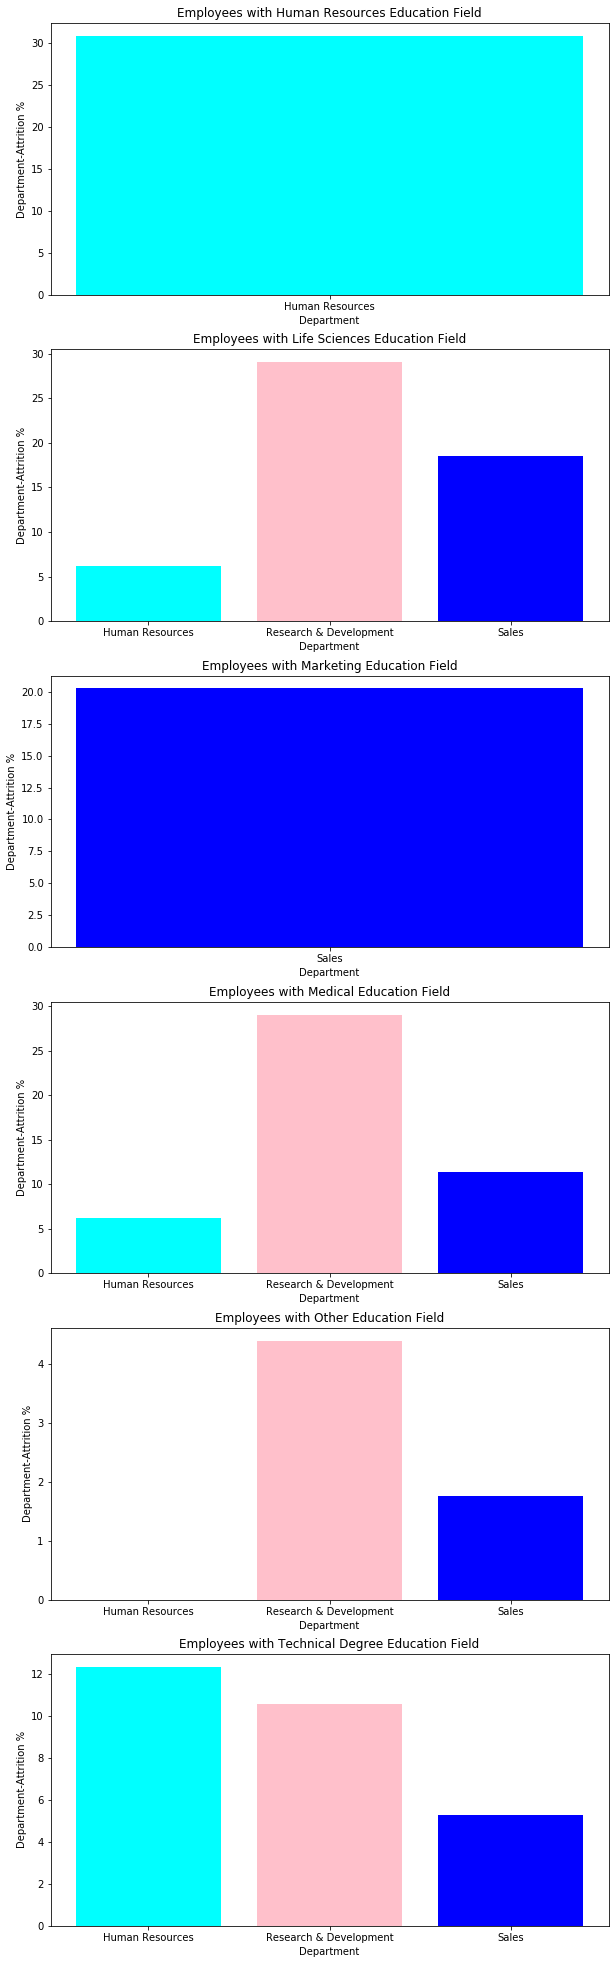

In [303]:
education_df = df[['EducationField','Department','Attrition']]
ed_field_list= []
dept_list = []
attrition_rate_list= []
HR_count = len(education_df[education_df['Department']=='Human Resources']) 
RD_count = len(education_df[education_df['Department']=='Research & Development'])
Sales_count = len(education_df[education_df['Department']=='Sales'])
education_dict = {}
for ed_field,dept_df in education_df.groupby('EducationField'):
    dept_df = dept_df.groupby('Department').sum()
    dept_dict = dept_df['Attrition'].to_dict()
    if 'Human Resources' in dept_dict:
        dept_dict['Human Resources'] = dept_dict['Human Resources']*100/HR_count
    if 'Sales' in dept_dict:
        dept_dict['Sales'] = dept_dict['Sales']*100/Sales_count
    if 'Research & Development' in dept_dict:
        dept_dict['Research & Development'] = dept_dict['Research & Development']*100/Sales_count
    education_dict[ed_field] = dept_dict
education_df = pd.DataFrame(education_dict)
count = 1 
plt.rcParams['figure.figsize'] = (10,35)
for i in list(education_df.columns):
    plt.subplot(6,1,count)
    count+=1
    plt.title('Employees with '+i+' Education Field')
    plt.bar(list(education_df.index),list(education_df[i]),color = ['cyan','pink','blue'])
    plt.xlabel('Department')
    plt.ylabel('Department-Attrition %')

- Among all the Employees working in HR Department, for Employees with HR Education background, attrition percent is highest (about 30%).
- Among all the Employees working in R&D Department, for Employees with Medical & Life Sciences background, attrition percent is higher compared to other backgrounds.
- Among all the Employees working in Sales Department, for Employees with Marketing Education background, attrition percent is highest (about 20%).
- This could mean that the versatility and different skill-sets obtained due to different education background comes in handy in reducing the chances of being fired.

#### Job Satisfaction,Job Involvement, Work Environment  VS Employee Attrition

C:\Users\kabra\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


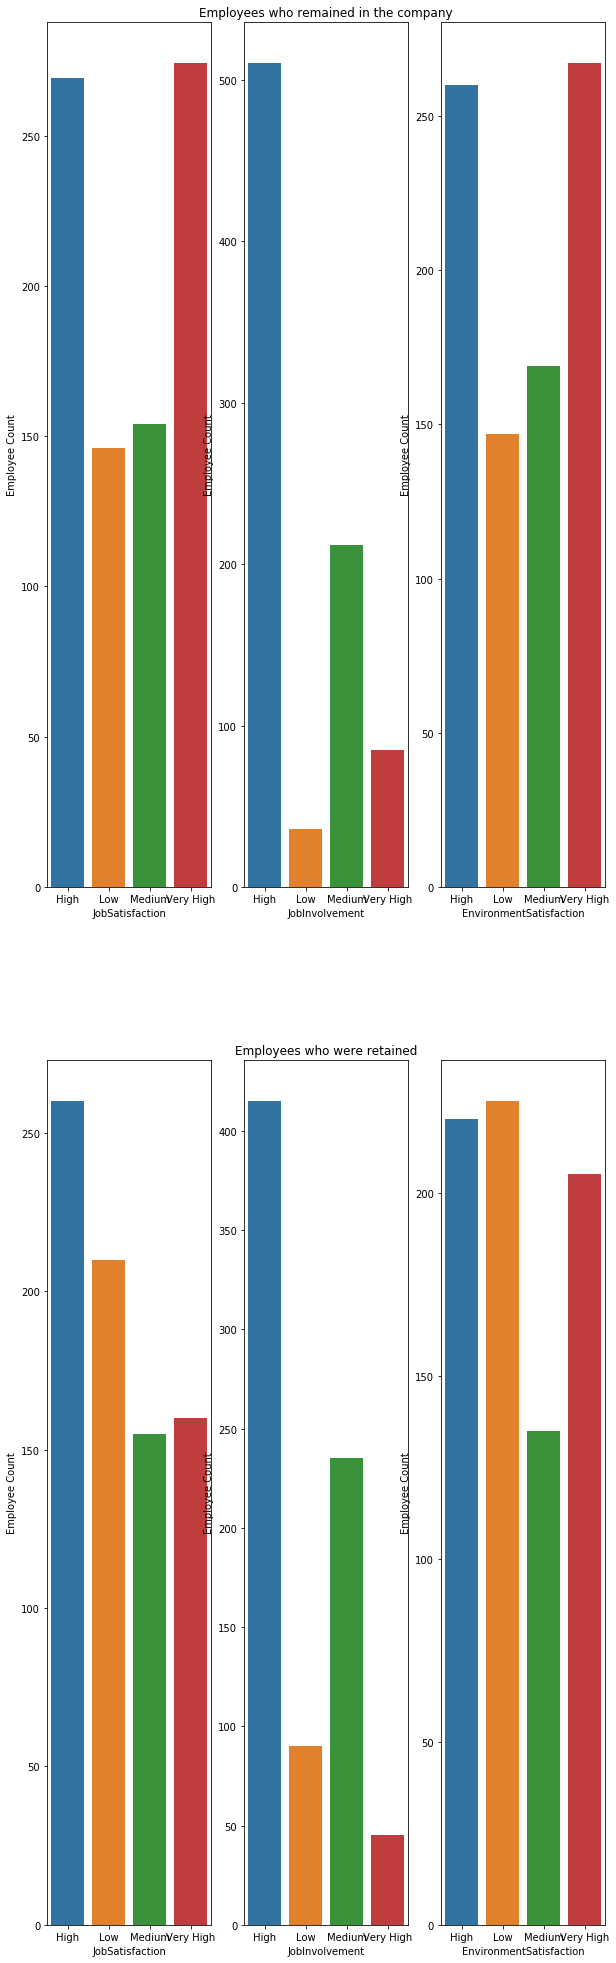

In [304]:
def RatingMap(value):  
    rating_dict = {1:'Low',2:'Medium',3:'High',4:'Very High'}
    return rating_dict[value]

employee_satisfaction_df = df[['JobSatisfaction','JobInvolvement','EnvironmentSatisfaction','Attrition']]
employee_retained = employee_satisfaction_df[employee_satisfaction_df['Attrition']==0]
employee_left = employee_satisfaction_df[employee_satisfaction_df['Attrition']==1]
for df_q in [employee_retained,employee_left]:
    for col in ['JobSatisfaction','JobInvolvement','EnvironmentSatisfaction']:
        df_q[col] = df_q[col].apply(lambda x:RatingMap(x))

#Visualizing for Employees Retained
count = 1
for employee_df in [employee_retained,employee_left]:
    for col in ['JobSatisfaction','JobInvolvement','EnvironmentSatisfaction']:
        retained_dict = employee_df.groupby(col)['Attrition'].count().to_dict()
        df_q = pd.DataFrame({col:list(retained_dict.keys()),'Employee Count':list(retained_dict.values())})
        plt.subplot(2,3,count)
        sns.barplot(data = df_q, x=col,y='Employee Count')
        count+=1
        if(count==3):
            plt.title('Employees who remained in the company')
        if(count==6):
            plt.title('Employees who were retained')

- In the above graph, we can see that many good Employees(more than 250) despite having High Job Involvement, Job Satisfaction, Environment Satisfaction left the company. This clearly indicates that were forced to leave due to the company's loss of revenues. 
- Interestingly, in the case of Employees leaving the company, equal number of them have left citing the reason as bad work environment, while in the case Employees retained less than 100 of them find it unsatisfactory. 
- Similarly, close to 200 employees have left due to lack of Job Satisfaction, only close to 150 of them found it highly satisfactory while in the case of retained employees, less than 150 have low Job Satisfaction and more than 250 employees find it satisfactory. In the case of Job involvement,Employees who left had very low involment compared to retained Employees by a factor of three.

#### Employee Performance Rating VS Employee Attrition

C:\Users\kabra\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kabra\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':
C:\Users\kabra\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


([<matplotlib.patches.Wedge at 0x163dad41108>,
 [Text(-0.977206207025497, 0.5050426011247384, 'High'),
  Text(1.0660431607289964, -0.5509555149582692, 'Very High')],
 [Text(-0.5330215674684529, 0.2754777824316755, '84.8%'),
  Text(0.6218585104252478, -0.32139071705899036, '15.2%')])

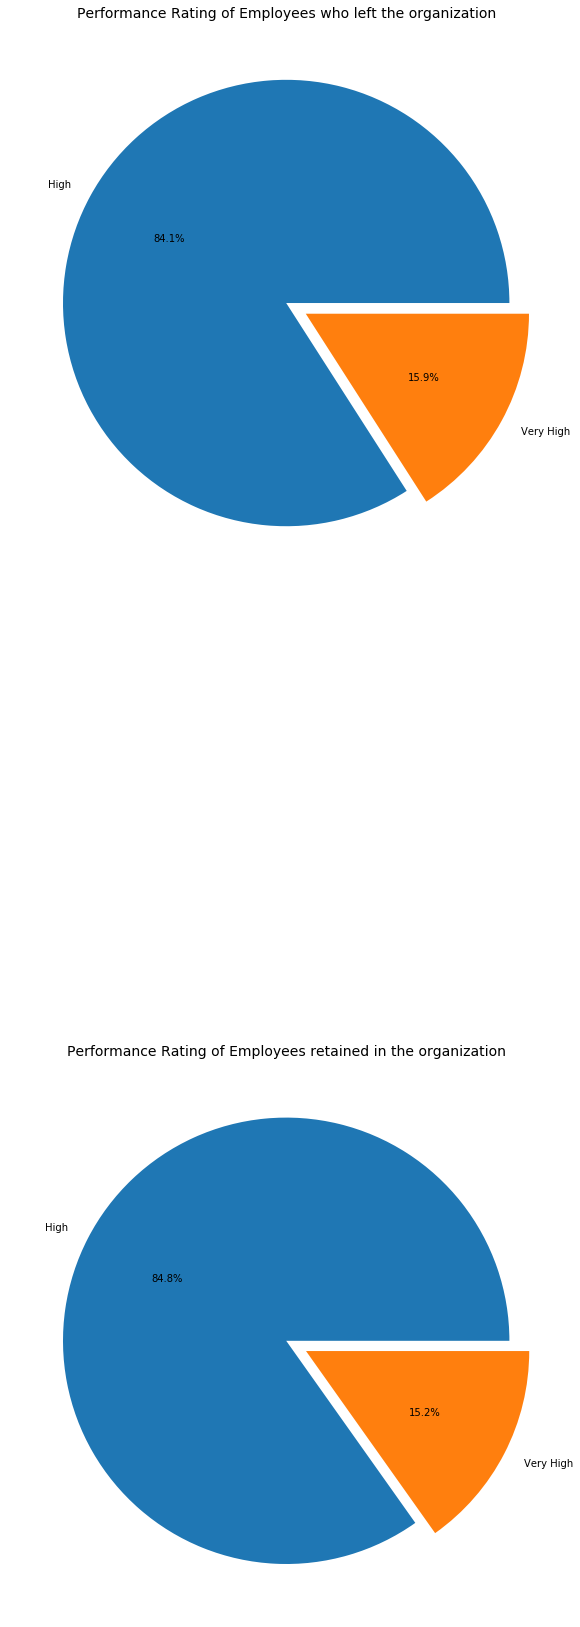

In [305]:
def performance(val):   
    performance_dict = {1:'Low',2:'Medium',3:'High',4:'Very High'}
    return performance_dict[val]
performance_df = df[['PerformanceRating','Attrition']]
performance_df['PerformanceRating'] = performance_df['PerformanceRating'].apply(lambda x:performance(x))
employees_left = performance_df[performance_df['Attrition']==1]
employees_retained = performance_df[performance_df['Attrition']==0]
#For Employees Staying
plt.subplot(2,1,1)
plt.title('Performance Rating of Employees who left the organization', fontsize=14, ha='center')
employees_left = employees_left.groupby('PerformanceRating').count()
plt.pie(employees_left,explode = (0,0.1),autopct='%1.1f%%',labels=list(employees_left.index)) 
#For Employess Retained
plt.subplot(2,1,2)
plt.title('Performance Rating of Employees retained in the organization', fontsize=14, ha='center')
employees_retained = employees_retained.groupby('PerformanceRating').count()
plt.pie(employees_retained,explode = (0,0.1),autopct='%1.1f%%',labels=list(employees_left.index))

- We see that Employees who left the organisation collectively had 0.7% greater than the retained employees in the very high performance category, even though employees there were higher number of Low Satisfaction cases in the Employees who left compared to Employees who were retained. 

#### Avg.years at company, Avg.years in current role, Avg.years since last promotion VS Attrition Rate

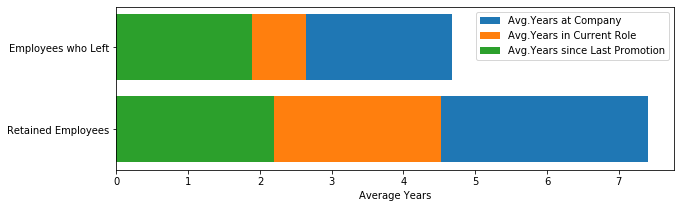

In [306]:
employee_year_df = df[['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','Attrition']]
employee_retained_df = employee_year_df[employee_year_df['Attrition']==0]
employee_left_df = employee_year_df[employee_year_df['Attrition']==1]
plt.rcParams['figure.figsize'] = (10,3)

Avg_years_company_retained = employee_retained_df['YearsAtCompany'].mean()
Avg_years_company_left = employee_left_df['YearsAtCompany'].mean()
plt.barh(['Retained Employees','Employees who Left'],[Avg_years_company_retained,Avg_years_company_left],label='Avg.Years at Company')

Avg_years_company_retained = employee_retained_df['YearsInCurrentRole'].mean()
Avg_years_company_left = employee_left_df['YearsInCurrentRole'].mean()
plt.barh(['Retained Employees','Employees who Left'],[Avg_years_company_retained,Avg_years_company_left],label='Avg.Years in Current Role')

Avg_years_company_retained = employee_retained_df['YearsSinceLastPromotion'].mean()
Avg_years_company_left = employee_left_df['YearsSinceLastPromotion'].mean()
plt.barh(['Retained Employees','Employees who Left'],[Avg_years_company_retained,Avg_years_company_left],label='Avg.Years since Last Promotion')

plt.xlabel('Average Years')
plt.legend()

- So we see that, Retained Employees have spent on average about 2.5 years in the current role, while the Employees leaving the organization less than a year in the current role. 
- Also, total years spent by retained employees on average were 3 years, while employees who left spent an average of 2 years. This shows that majority of sacked employees were promoted recently into the current role, albeit high performing and in equal footing to the Retained Employees.

#### Job Role, Behaviour and Communication Skill VS Attrition Rate

C:\Users\kabra\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kabra\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


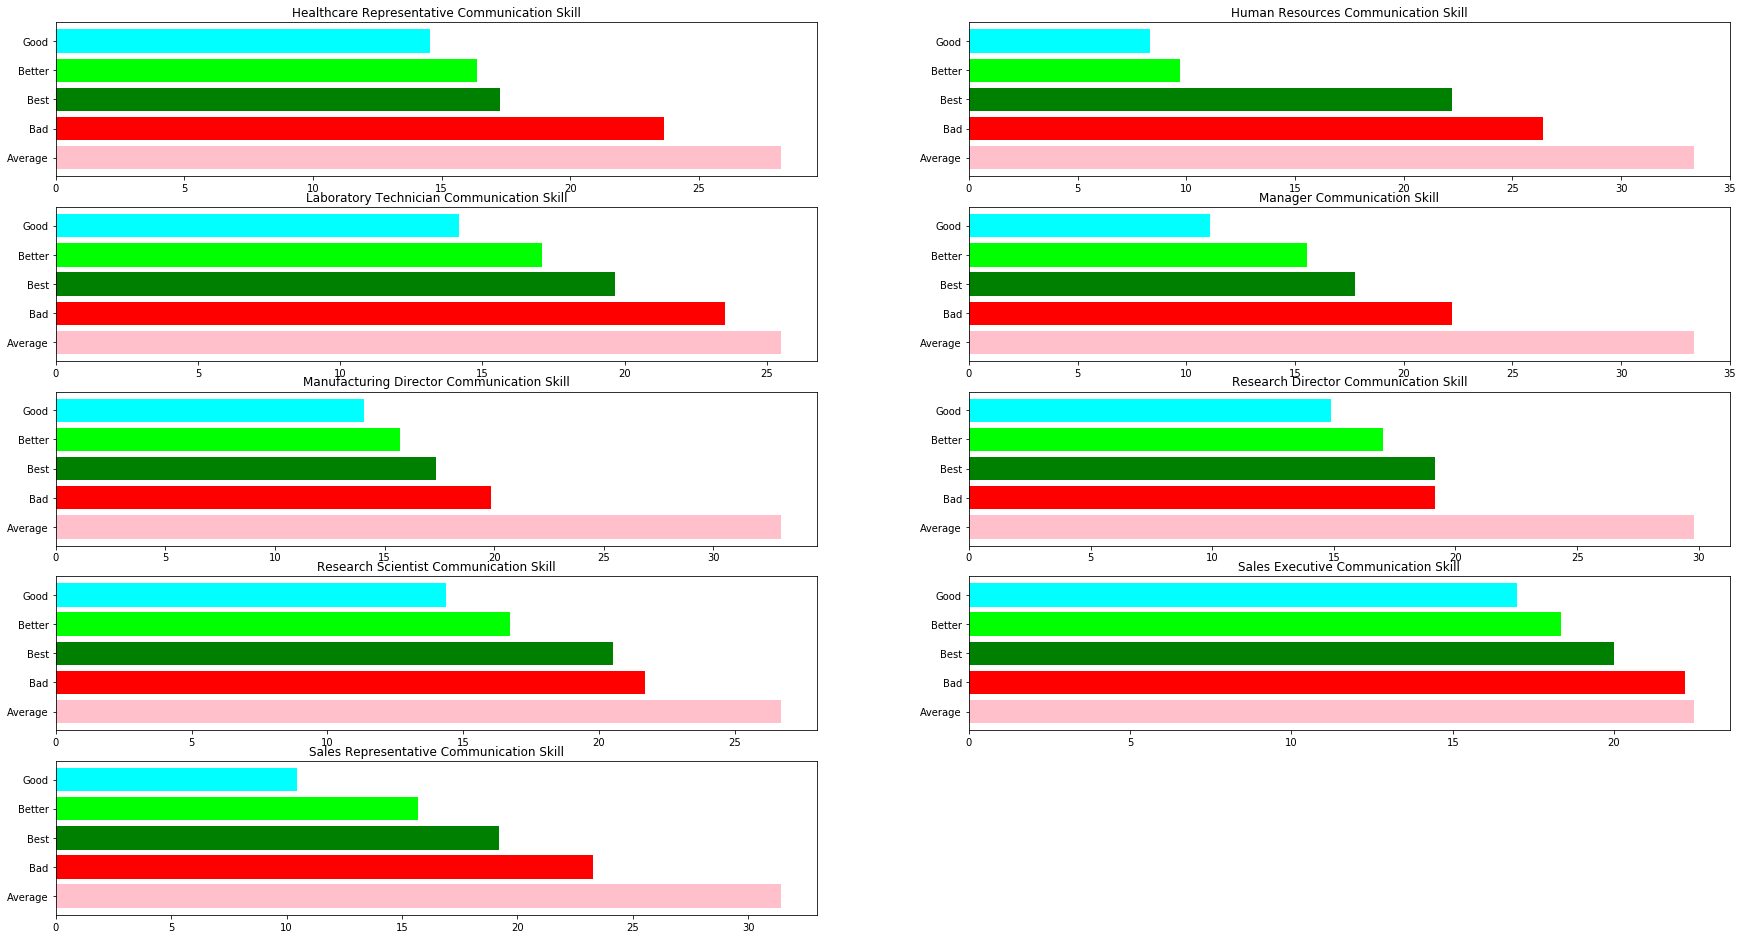

In [307]:
def behaviour(val):
    behaviour_dict = {1:'Good',2:'Bad',3:'Not Rated'}
    return behaviour_dict[val]
def communication(val):
    communication_dict = {1:'Bad',2:'Average',3:'Good',4:'Better',5:'Best'}
    return communication_dict[val]
df_q = df[['JobRole','Behaviour','CommunicationSkill']]
df_q['Behaviour'] = df['Behaviour'].apply(lambda x: behaviour(x))
df_q['CommunicationSkill'] = df['CommunicationSkill'].apply(lambda x: communication(x))
jobrole_count = len(set(df_q['JobRole']))
count = 1
plt.rcParams['figure.figsize'] = (30,30) 
for jobrole,jobrole_df in df_q.groupby('JobRole'):
    total_count = len(jobrole_df)
    behaviour_dict = (jobrole_df['Behaviour'].value_counts()*100/total_count).to_dict()
    comm_dict = (jobrole_df['CommunicationSkill'].value_counts()*100/total_count).to_dict()
    plt.subplot(jobrole_count,2,count)
    plt.title(jobrole+' Communication Skill')
    plt.barh(sorted(comm_dict.keys()),list(comm_dict.values()),color=['pink','red','green','lime','cyan'])
    count+=1

- We see that across all Job Roles, every employee behaviour is good, whereas the highest percentage of Bad Communication Skill is observed among Sales Executive, Sales Representative (about 23%). 
- Interestingly, more than 30% of Sales Representative have average Communication Skill, third only to Human Resources, Managers. Highest percentage of best communication is observed among Human Resources (about 25%).

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

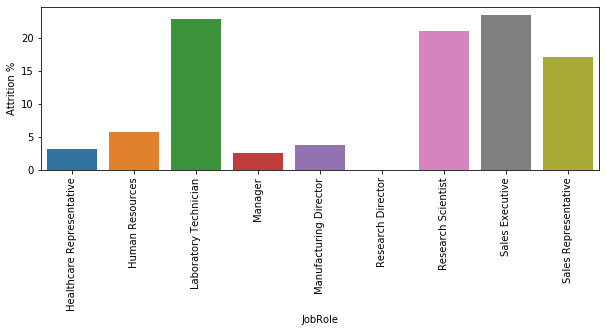

In [308]:
df_q = df[['JobRole','Attrition']]
JobRole_attrition_df = df_q.groupby('JobRole').sum()
total_Attrition = JobRole_attrition_df['Attrition'].sum()
JobRole_attrition_df['JobRole'] = list(JobRole_attrition_df.index) 
JobRole_attrition_df.index = range(len(JobRole_attrition_df))
JobRole_attrition_df['Attrition %'] = JobRole_attrition_df['Attrition']*100/total_Attrition
plt.rcParams['figure.figsize'] = (10,3)
sns.barplot(data = JobRole_attrition_df,x='JobRole',y='Attrition %')
plt.xticks(rotation=90)

- It appears that Attrition % is highest among Sales Executive (23%), closely followed by Laboratory (22%) Technician, followed by Research Scientist (21%). These three job roles have suffered more compared to other job roles. Lowest Attrition % is observed for the role of Research Director (0%). 
- The general trend observed here is that bigger the role is in an organization, less are the chances of being released from the company.
- Since we found that every employee had good behaviour irrespective of which Job Roles they belonged to. The behaviour doesn't dictate the firing or retaining of the Employees.

C:\Users\kabra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Communication Skill vs Attrition %')

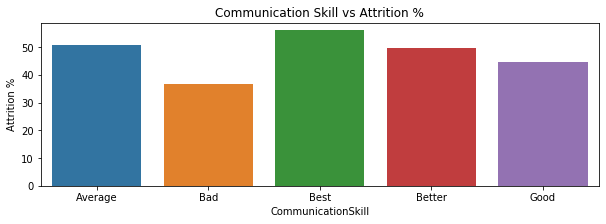

In [309]:
df_q = df[['CommunicationSkill','Attrition']]
df_q['CommunicationSkill'] = df_q['CommunicationSkill'].apply(lambda x:communication(x))
attrition_df = df_q[['CommunicationSkill','Attrition']].groupby('CommunicationSkill').sum()
comm_skill_count_df = df_q['CommunicationSkill'].value_counts()
attrition_df['Attrition %'] = attrition_df['Attrition']*100/comm_skill_count_df
attrition_df['CommunicationSkill'] = list(attrition_df.index)
attrition_df.index = range(len(attrition_df))
sns.barplot(data=attrition_df,x='CommunicationSkill',y='Attrition %')
plt.title('Communication Skill vs Attrition %')

#### Age, Gender VS Attrition Rate

Text(0, 0.5, 'Employee Relative frequency')

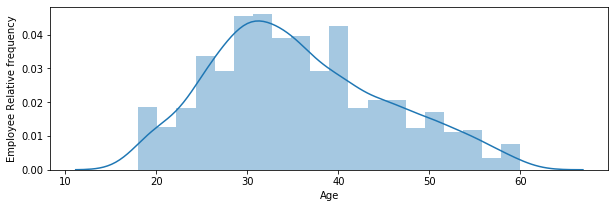

In [310]:
age_gen_df = df[['Age','Gender','Attrition']]
sns.distplot(age_gen_df['Age'])
plt.ylabel('Employee Relative frequency')

- In the above figure, we see that all the employees lies in the range of 10-60 yrs, with majority of them in the age group of 30-40. We will use the range 10-60 and divide it into several age-groups at the interval of 10 to calculate attrition % among them, which makes sense since after 60yrs of age, Employees retire from the organization.

Text(0.5, 1.0, 'Gender-wise Age group vs Attrition %')

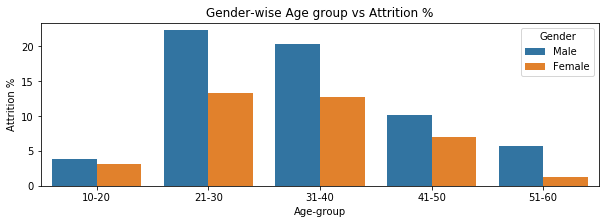

In [311]:
age_groups = [[10,20],[21,30],[31,40],[41,50],[51,60]]
result = []
total_attrition = age_gen_df['Attrition'].sum()
for group in age_groups:
    df_q = age_gen_df[(age_gen_df['Age']>=group[0]) & (age_gen_df['Age']<=group[1])]
    age_df = df_q[['Age','Attrition']].groupby('Age').sum()
    for gen in ['Male','Female']:
        gender_df = df_q[df_q['Gender']==gen]
        result.append([str(group[0])+'-'+str(group[1]),gender_df['Attrition'].sum()*100/total_attrition,gen])
age_group_df = pd.DataFrame(data = result,columns=['Age-group','Attrition %','Gender'])
sns.barplot(data = age_group_df,x='Age-group',y='Attrition %',hue='Gender')
plt.title('Gender-wise Age group vs Attrition %')

- So, we see that the age-group of 21-30 suffers the highest attrition (about 23% in Male, 13% in Female), which makes sense since majority of them are freshers in company starting straight after finishing from the college. They are the dispensable resources due to lack of skills, and are let go first if the cash flow of the company starts falling due to external factors. 
- For 10-20 age group its less because very less no. of people start their corporate career at the age of 19 or 20. For higher age group, the attrition % starts falling due to high amount of exposure, experience leads to firm grip in their positioning and role in the company.

#### Business Travel, Marital Status VS Attrition Rate

Text(0.5, 1.0, 'Business Travel, Marital Status of Employees')

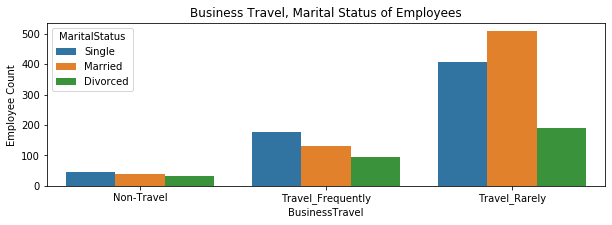

In [312]:
marriage_df = df[['MaritalStatus','BusinessTravel']]
df_list = []
for travel_info,status_df in marriage_df.groupby('BusinessTravel'):
    new_status = status_df['MaritalStatus'].value_counts()
    new_status_df = pd.DataFrame({'MaritalStatus':list(new_status.index),'Employee Count':list(new_status)})
    new_status_df.index = range(len(new_status_df))
    new_status_df['BusinessTravel'] = [travel_info]*len(new_status_df)
    df_list.append(new_status_df)
marriage_df = pd.concat(df_list)
sns.barplot(data=marriage_df,x='BusinessTravel',y='Employee Count',hue='MaritalStatus')
plt.title('Business Travel, Marital Status of Employees')

- Here, we see that Married Employees travel rarely (about 500),which is highest in that category since they have to take care of their household, rarely making time for business travel. 
- While, in the Travel Frequently Category, Bachelors take up highest count(about 180) since they don't have the burden of raising children, household chores unlike Married Employees. 
- But, interestingly, Divorced Employee Count is lowest in all the three category. This can also be because of less number of records for Divorced Employees.

Text(0.5, 1.0, 'Traveling Frequency vs Attrition %')

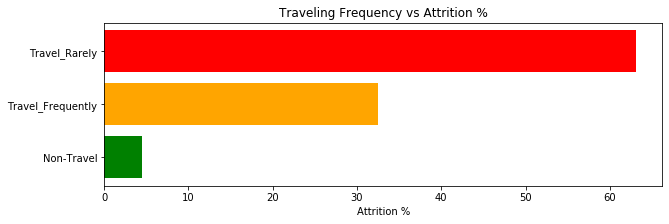

In [313]:
travel_df = df[['BusinessTravel','Attrition']]
total_attrition = travel_df['Attrition'].sum()
travel_attrition_df = travel_df[['BusinessTravel','Attrition']].groupby('BusinessTravel').sum()*100/total_attrition
plt.barh(list(travel_attrition_df.index),list(travel_attrition_df['Attrition']),color=['Green','Orange','Red'])
plt.xlabel('Attrition %')
plt.title('Traveling Frequency vs Attrition %')

- Jobs involving rare traveling have been affected the most having more than 60% Attrition Rate. While, Jobs involving Non-travel have the least Attrition Rate of less than 5%. Makes sense, because in recent times, majority of firings have been taken place for working in IT Sectors as Software Engineers. This concludes that majority of jobs that were affected rarely involved traveling, traveling restrictions didn't impact jobs as much as loss of revenues due to the lockdown measures.

In [314]:
X = df
X_test = test

In [315]:
y = X['Attrition']
X.drop(['Attrition'], axis =1, inplace=True)

In [316]:
from sklearn.model_selection import train_test_split
X.drop(columns='Id',inplace=True)
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=1)

## Encoding

In [318]:
#check the unique values in object columns to see whether to do hotencoding or labelencoding on them
obj_dict_train={obj_col: list(X_train[obj_col].unique()) for obj_col in X_train.select_dtypes(include='object')}
obj_dict_train

{'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],
 'Department': ['Research & Development', 'Sales', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Medical',
  'Marketing',
  'Technical Degree',
  'Other',
  'Human Resources'],
 'Gender': ['Male', 'Female'],
 'JobRole': ['Research Scientist',
  'Sales Representative',
  'Laboratory Technician',
  'Sales Executive',
  'Healthcare Representative',
  'Manager',
  'Manufacturing Director',
  'Research Director',
  'Human Resources'],
 'MaritalStatus': ['Married', 'Single', 'Divorced'],
 'OverTime': ['No', 'Yes']}

In [319]:
obj_dict_valid={obj_col: list(X_valid[obj_col].unique()) for obj_col in X_valid.select_dtypes(include='object')}
obj_dict_valid


{'BusinessTravel': ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'],
 'Department': ['Research & Development', 'Sales', 'Human Resources'],
 'EducationField': ['Life Sciences',
  'Marketing',
  'Medical',
  'Technical Degree',
  'Other',
  'Human Resources'],
 'Gender': ['Male', 'Female'],
 'JobRole': ['Research Scientist',
  'Sales Representative',
  'Manager',
  'Healthcare Representative',
  'Sales Executive',
  'Laboratory Technician',
  'Manufacturing Director',
  'Human Resources',
  'Research Director'],
 'MaritalStatus': ['Single', 'Married', 'Divorced'],
 'OverTime': ['No', 'Yes']}

In [320]:
label_col = ['BusinessTravel', 'OverTime']     # these two have ordinal categorical data
hotencode_col = list(set(X.select_dtypes(include='object').columns)-set(label_col)) 

### Hot Encoding

In [322]:
X_train = pd.concat([X_train, pd.get_dummies(X_train[hotencode_col])], axis=1)
X_valid = pd.concat([X_valid, pd.get_dummies(X_valid[hotencode_col])], axis=1)
X_train.drop(hotencode_col, axis=1, inplace=True)
X_valid.drop(hotencode_col,axis=1,inplace=True)

X_test = pd.concat([X_test, pd.get_dummies(X_test[hotencode_col])], axis=1)
X_test.drop(hotencode_col, axis=1, inplace=True)

In [323]:
### Ordinal Encoding

In [325]:
cat1 = pd.Categorical(X_train.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels1, unique1 = pd.factorize(cat1, sort=True)
X_train['BusinessTravel'] = labels1

#for ordinally encoding OverTime column in train set
cat2 = pd.Categorical(X_train.OverTime, categories=['No','Yes'], ordered=True)
labels2, unique2 = pd.factorize(cat2, sort=True)
X_train['OverTime'] = labels2


#for ordinally encoding BussinessTravel column in validation set
cat_1 = pd.Categorical(X_valid.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels_1, unique_1 = pd.factorize(cat_1, sort=True)
X_valid['BusinessTravel'] = labels_1

#for ordinally encoding OverTime column in validation set
cat_2 = pd.Categorical(X_valid.OverTime, categories=['No','Yes'], ordered=True)
labels_2, unique_2 = pd.factorize(cat_2, sort=True)
X_valid['OverTime'] = labels_2

In [326]:
cat_test1 = pd.Categorical(X_test.BusinessTravel, categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)
labels_test1, unique_test1 = pd.factorize(cat_test1, sort=True)
X_test['BusinessTravel'] = labels_test1

#for ordinally encoding OverTime column in test set
cat_test2 = pd.Categorical(X_test.OverTime, categories=['No','Yes'], ordered=True)
labels_test2, unique_test2 = pd.factorize(cat_test2, sort=True)
X_test['OverTime'] = labels_test2

In [327]:
# dropping useless columns
X_train.drop(columns =['Behaviour','Gender_Female'], inplace=True)
X_valid.drop(columns =['Behaviour','Gender_Female'], inplace=True)
X_test.drop(columns =['Behaviour','Gender_Female'], inplace=True)

### Feature Scaling

In [329]:
#the columns with numerical data
X_train.nunique()

Age                                   43
BusinessTravel                         1
DistanceFromHome                      29
Education                              5
EmployeeNumber                       754
EnvironmentSatisfaction                4
JobInvolvement                         4
JobSatisfaction                        4
MonthlyIncome                        717
NumCompaniesWorked                    10
OverTime                               1
PercentSalaryHike                     15
PerformanceRating                      2
StockOptionLevel                       4
TotalWorkingYears                     39
TrainingTimesLastYear                  7
YearsAtCompany                        32
YearsInCurrentRole                    18
YearsSinceLastPromotion               16
YearsWithCurrManager                  17
CommunicationSkill                     5
JobRole_Healthcare Representative      2
JobRole_Human Resources                2
JobRole_Laboratory Technician          2
JobRole_Manager 

In [330]:
num_cols = [col for col in X_train.columns if X_train[col].nunique()>5]

In [331]:
from sklearn.preprocessing import StandardScaler

num_scaler = StandardScaler(copy=False)

scaled_train = pd.DataFrame(num_scaler.fit_transform(X_train[num_cols]))
scaled_valid = pd.DataFrame(num_scaler.transform(X_valid[num_cols]))
scaled_test = pd.DataFrame(num_scaler.transform(X_test[num_cols]))
scaled_test.columns  = num_cols
scaled_train.columns = num_cols
scaled_valid.columns = num_cols
scaled_train.index=X_train.index
scaled_valid.index=X_valid.index
scaled_test.index=X_test.index

In [332]:
X_train.drop(columns = num_cols, inplace=True)
X_valid.drop(columns = num_cols, inplace=True)
X_test.drop(columns = num_cols, inplace =True)
X_train = pd.concat([X_train, scaled_train], axis =1)
X_valid = pd.concat([X_valid, scaled_valid], axis =1)
X_test = pd.concat([X_test, scaled_test], axis =1)

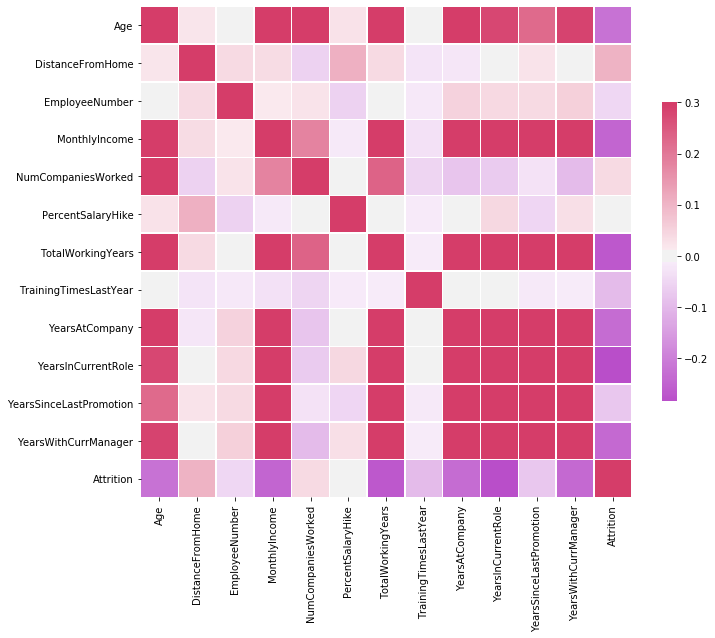

In [333]:
data_pair = pd.concat([X_train[num_cols],y_train], axis=1)
corr_matrix = data_pair.corr()
cmap = sns.diverging_palette(300, 0, as_cmap=True)
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Feature Engineering

#### Categorical Features

In [336]:
X_train['stock0'] = (X_train.StockOptionLevel==0).astype(int)
X_valid['stock0'] = (X_valid.StockOptionLevel==0).astype(int)
X_test['stock0'] = (X_test.StockOptionLevel==0).astype(int)

X_train['jobsatisfied'] = (X_train.JobSatisfaction==4).astype(int)
X_valid['jobsatisfied'] = (X_valid.JobSatisfaction==4).astype(int)
X_test['jobsatisfied'] = (X_test.JobSatisfaction==4).astype(int)

X_train['well_communicate'] = (X_train.CommunicationSkill==5).astype(int)
X_valid['well_communicate'] = (X_valid.CommunicationSkill==5).astype(int)
X_test['well_communicate'] = (X_test.CommunicationSkill==5).astype(int)

X_train['less_mi'] = (X_train.MonthlyIncome<0.2).astype(int)
X_valid['less_mi'] = (X_valid.MonthlyIncome<0.2).astype(int)
X_test['less_mi'] = (X_test.MonthlyIncome<0.2).astype(int)

#### Numerical Features

In [338]:
X_train['mi_age']=X_train.MonthlyIncome*X_train.Age
X_valid['mi_age']=X_valid.MonthlyIncome*X_valid.Age
X_test['mi_age']=X_test.MonthlyIncome*X_test.Age

X_train['twy_age']=X_train.TotalWorkingYears*X_train.Age
X_valid['twy_age']=X_valid.TotalWorkingYears*X_valid.Age
X_test['twy_age']=X_test.TotalWorkingYears*X_test.Age

X_train['yac_age']=np.square(X_train.YearsAtCompany)/0.7+np.square(X_train.Age)
X_valid['yac_age']=np.square(X_valid.YearsAtCompany)/0.7+np.square(X_valid.Age)
X_test['yac_age']=np.square(X_test.YearsAtCompany)/0.7+np.square(X_test.Age)

X_train['mi_dfh']=np.square(X_train.MonthlyIncome)/0.2-np.square(X_train.DistanceFromHome)
X_valid['mi_dfh']=np.square(X_valid.MonthlyIncome)/0.2-np.square(X_valid.DistanceFromHome)
X_test['mi_dfh']=np.square(X_test.MonthlyIncome)/0.2-np.square(X_test.DistanceFromHome)

X_train['yac_dfh']=np.square(X_train.YearsAtCompany)/0.5-np.square(X_train.DistanceFromHome)
X_valid['yac_dfh']=np.square(X_valid.YearsAtCompany)/0.5-np.square(X_valid.DistanceFromHome)
X_test['yac_dfh']=np.square(X_test.YearsAtCompany)/0.5-np.square(X_test.DistanceFromHome)

X_train['mi_twc']=X_train.MonthlyIncome*X_train.TotalWorkingYears
X_valid['mi_twc']=X_valid.MonthlyIncome*X_valid.TotalWorkingYears
X_test['mi_twc']=X_test.MonthlyIncome*X_test.TotalWorkingYears

X_train['mi_yac']=X_train.MonthlyIncome*X_train.YearsAtCompany
X_valid['mi_yac']=X_valid.MonthlyIncome*X_valid.YearsAtCompany
X_test['mi_yac']=X_test.MonthlyIncome*X_test.YearsAtCompany

X_train['twy_ywcm']=np.square(X_train.TotalWorkingYears)/0.6-np.square(X_train.YearsWithCurrManager)/8
X_valid['twy_ywcm']=np.square(X_valid.TotalWorkingYears)/0.6-np.square(X_valid.YearsWithCurrManager)/8
X_test['twy_ywcm']=np.square(X_test.TotalWorkingYears)/0.6-np.square(X_test.YearsWithCurrManager)/8

In [339]:
# scaling the newly formed features
new_cols =['mi_age','twy_age','yac_age','mi_dfh','yac_dfh','mi_twc','mi_yac','twy_ywcm']
scaled_train1 = pd.DataFrame(num_scaler.fit_transform(X_train[new_cols]))
scaled_valid1 = pd.DataFrame(num_scaler.transform(X_valid[new_cols]))
scaled_test1 = pd.DataFrame(num_scaler.transform(X_test[new_cols]))
scaled_test1.columns = new_cols
scaled_train1.columns = new_cols
scaled_valid1.columns = new_cols
scaled_train1.index=X_train.index
scaled_valid1.index=X_valid.index
scaled_test1.index=X_test.index

X_train.drop(columns = new_cols, inplace=True)
X_valid.drop(columns = new_cols, inplace=True)
X_test.drop(columns = new_cols, inplace =True)
X_train = pd.concat([X_train, scaled_train1], axis =1)
X_valid = pd.concat([X_valid, scaled_valid1], axis =1)
X_test = pd.concat([X_test, scaled_test1], axis =1)

### Handling Skewed Columns

In [341]:
num_cols2 = [col for col in X_train.columns if X_train[col].nunique()>10]


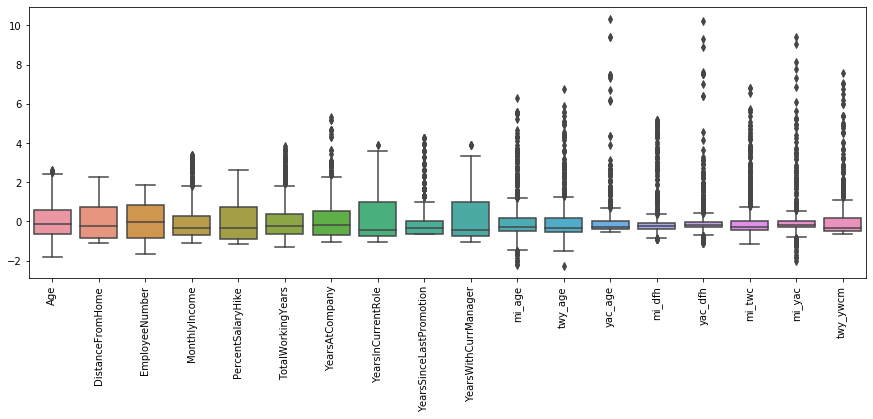

In [342]:
# using boxplot to check for outliers and skewedness
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_train[num_cols2])
plt.xticks(rotation=90)
plt.show()


As we can see many columns are skewed and have outliers. To treat them, we shall perform some transformations (log or sqrt mainly) on the selected columns to minimize their skewness. Again I have already tried many combinations before choosing the below transformations

In [343]:
X_train['twy_ywcm'] = np.log(2+X_train.twy_ywcm/2)
X_train['mi_yac'] = np.log(3+X_train.mi_yac)
X_train['mi_twc'] = np.log(3+X_train.mi_twc)
X_train['yac_dfh'] = np.log(2+X_train.yac_dfh)
X_train['mi_dfh'] = np.log(2+X_train.mi_dfh)
X_train['yac_age'] = np.log(2+X_train.yac_age)
X_train['twy_age'] = np.sqrt(3+X_train.twy_age)
X_train['mi_age'] = np.sqrt(3+X_train.mi_age)
X_train['YearsSinceLastPromotion'] = np.log(1.5+X_train.YearsSinceLastPromotion/2)
X_train['MonthlyIncome'] = np.log(2+X_train.MonthlyIncome)
X_train['TotalWorkingYears'] = np.log(2+X_train.TotalWorkingYears)
X_train['YearsAtCompany'] = np.sqrt(3+X_train.YearsAtCompany/5)

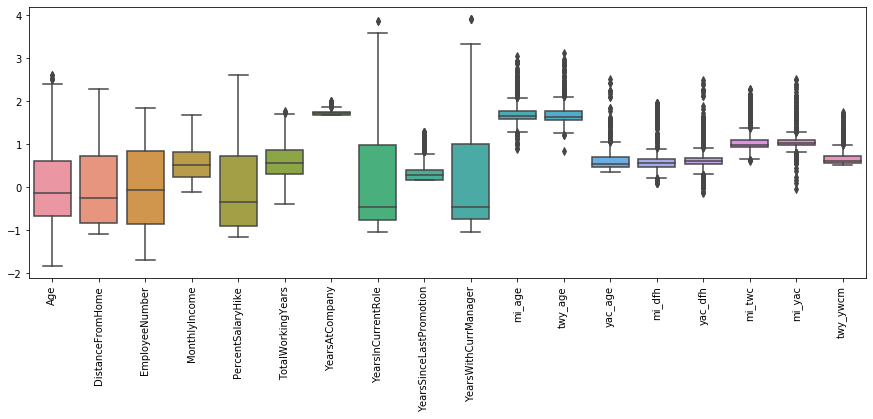

In [344]:
# again plot the boxplot to see the difference
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_train[num_cols2])
plt.xticks(rotation=90)
plt.show()

In [345]:
# creating same features for validation set
X_valid['twy_ywcm'] = np.log(2+X_valid.twy_ywcm/2)
X_valid['mi_yac'] = np.log(3+X_valid.mi_yac)
X_valid['mi_twc'] = np.log(3+X_valid.mi_twc)
X_valid['yac_dfh'] = np.log(2+X_valid.yac_dfh)
X_valid['mi_dfh'] = np.log(2+X_valid.mi_dfh)
X_valid['yac_age'] = np.log(2+X_valid.yac_age)
X_valid['twy_age'] = np.sqrt(3+X_valid.twy_age)
X_valid['mi_age'] = np.sqrt(3+X_valid.mi_age)
X_valid['YearsSinceLastPromotion'] = np.log(1.5+X_valid.YearsSinceLastPromotion/2)
X_valid['MonthlyIncome'] = np.log(2+X_valid.MonthlyIncome)
X_valid['TotalWorkingYears'] = np.log(2+X_valid.TotalWorkingYears)
X_valid['YearsAtCompany'] = np.sqrt(3+X_valid.YearsAtCompany/5)

In [346]:
# creating same features for test set
X_test['twy_ywcm'] = np.log(2+X_test.twy_ywcm/2)
X_test['mi_yac'] = np.log(3+X_test.mi_yac)
X_test['mi_twc'] = np.log(3+X_test.mi_twc)
X_test['yac_dfh'] = np.log(2+X_test.yac_dfh)
X_test['mi_dfh'] = np.log(2+X_test.mi_dfh)
X_test['yac_age'] = np.log(2+X_test.yac_age)
X_test['twy_age'] = np.sqrt(3+X_test.twy_age)
X_test['mi_age'] = np.sqrt(3+X_test.mi_age)
X_test['YearsSinceLastPromotion'] = np.log(1.5+X_test.YearsSinceLastPromotion/2)
X_test['MonthlyIncome'] = np.log(2+X_test.MonthlyIncome)
X_test['TotalWorkingYears'] = np.log(2+X_test.TotalWorkingYears)
X_test['YearsAtCompany'] = np.sqrt(3+X_test.YearsAtCompany/5)

In [347]:
X_train_final = pd.concat([X_train,X_valid],axis=0)
y_train_final = pd.concat([y_train,y_valid],axis=0)
X_train_final.reset_index(drop=True)
y_train_final.reset_index(drop=True)

0       0
1       1
2       1
3       1
4       1
       ..
1623    1
1624    1
1625    1
1626    0
1627    0
Name: Attrition, Length: 1628, dtype: int64

## MODEL

#### After GridSearch Results, I found out that Logistic Regression would be the most beneficial.
- Not showed here due to comutational resources.

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score

In [351]:
num_iters=np.arange(200,501,50)
C = np.arange(0.1,3,0.1, dtype=np.float32)
arg=[]
for i in C:
    for j in num_iters: arg.append((j,i))

In [352]:
# model for checking the validation score
def model(arg):
    num_iters = arg[0]
    C=arg[1]
    lr=LogisticRegression(solver='liblinear', max_iter=num_iters,C=C, verbose=0, random_state=7)
    lr.fit(X_train,y_train)
    predictions = lr.predict(X_valid)
    return roc_auc_score(y_valid,predictions)

In [353]:
for params in arg:
    score = model(params)
    print("C={}, iterations={} : {}".format(params[1],params[0],score))

C=0.10000000149011612, iterations=200 : 0.7258606845327713
C=0.10000000149011612, iterations=250 : 0.7258606845327713
C=0.10000000149011612, iterations=300 : 0.7258606845327713
C=0.10000000149011612, iterations=350 : 0.7258606845327713
C=0.10000000149011612, iterations=400 : 0.7258606845327713
C=0.10000000149011612, iterations=450 : 0.7258606845327713
C=0.10000000149011612, iterations=500 : 0.7258606845327713
C=0.20000000298023224, iterations=200 : 0.7340911372076684
C=0.20000000298023224, iterations=250 : 0.7340911372076684
C=0.20000000298023224, iterations=300 : 0.7340911372076684
C=0.20000000298023224, iterations=350 : 0.7340911372076684
C=0.20000000298023224, iterations=400 : 0.7340911372076684
C=0.20000000298023224, iterations=450 : 0.7340911372076684
C=0.20000000298023224, iterations=500 : 0.7340911372076684
C=0.30000001192092896, iterations=200 : 0.7320084311954231
C=0.30000001192092896, iterations=250 : 0.7320084311954231
C=0.30000001192092896, iterations=300 : 0.73200843119542

C=2.200000047683716, iterations=350 : 0.7505520425574627
C=2.200000047683716, iterations=400 : 0.7505520425574627
C=2.200000047683716, iterations=450 : 0.7505520425574627
C=2.200000047683716, iterations=500 : 0.7505520425574627
C=2.299999952316284, iterations=200 : 0.7505520425574627
C=2.299999952316284, iterations=250 : 0.7505520425574627
C=2.299999952316284, iterations=300 : 0.7505520425574627
C=2.299999952316284, iterations=350 : 0.7505520425574627
C=2.299999952316284, iterations=400 : 0.7505520425574627
C=2.299999952316284, iterations=450 : 0.7505520425574627
C=2.299999952316284, iterations=500 : 0.7505520425574627
C=2.3999998569488525, iterations=200 : 0.7505520425574627
C=2.3999998569488525, iterations=250 : 0.7505520425574627
C=2.3999998569488525, iterations=300 : 0.7505520425574627
C=2.3999998569488525, iterations=350 : 0.7505520425574627
C=2.3999998569488525, iterations=400 : 0.7505520425574627
C=2.3999998569488525, iterations=450 : 0.7505520425574627
C=2.3999998569488525, ite

In [354]:
lr_final = LogisticRegression( solver='liblinear',C=1.8, max_iter=300,random_state=7)
lr_final.fit(X_train,y_train)
pred_lr = lr_final.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid,pred_lr)

0.8204690688882198

### Feature Selection

In [356]:
feature_weights = np.array(lr_final.coef_).reshape(-1)

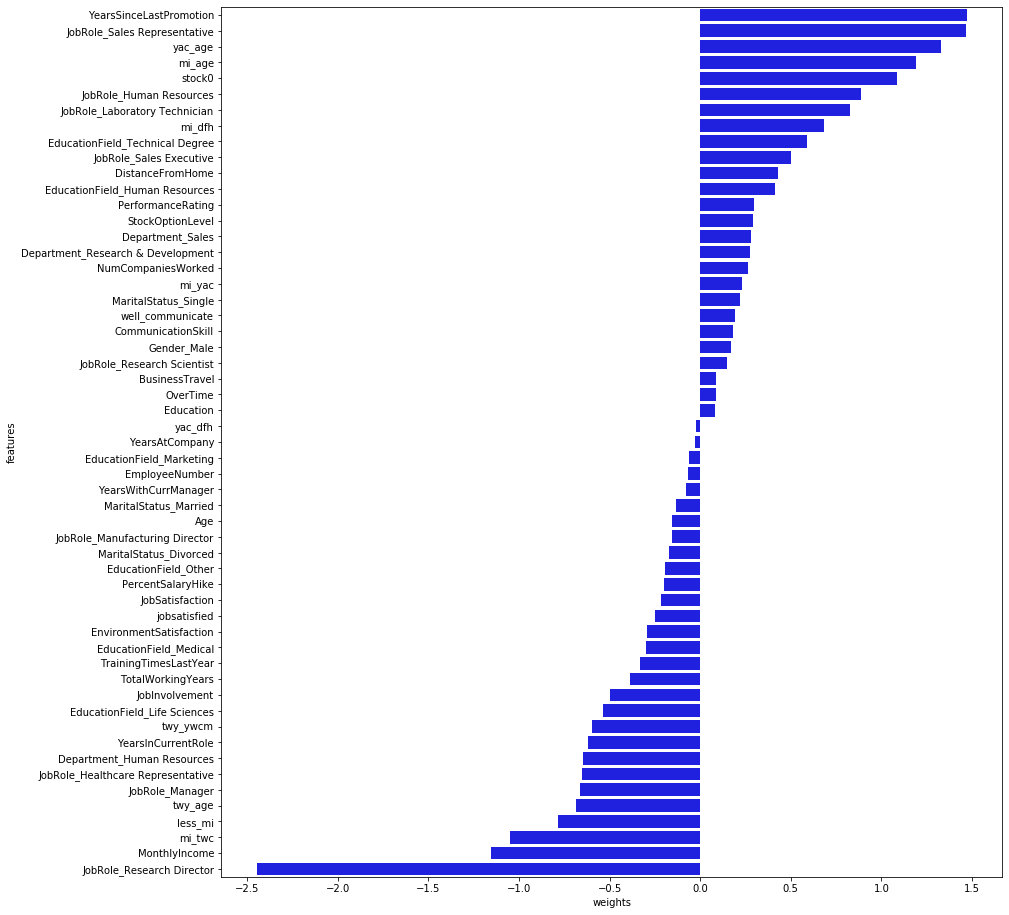

In [357]:
feature_val = pd.DataFrame({'features':X_train.columns, 'weights':feature_weights})
feature_val.sort_values(by='weights', ascending=False, inplace=True)
plt.figure(figsize=(14,16))
sns.barplot(y='features',x='weights',data=feature_val,color='blue')
plt.show()

In [358]:
#Columns which have absolute value of weights less than 0.1
less_weight_cols= feature_val[abs(feature_val.weights)<0.1].features.to_list()
less_weight_cols

['BusinessTravel',
 'OverTime',
 'Education',
 'yac_dfh',
 'YearsAtCompany',
 'EducationField_Marketing',
 'EmployeeNumber',
 'YearsWithCurrManager']

In [359]:
X_train_final.drop(columns=less_weight_cols,inplace=True)

X_test.drop(columns=less_weight_cols,inplace=True)

In [360]:
lr_final.fit(X_train_final,y_train_final)
lr_final

LogisticRegression(C=1.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Output

In [363]:
final_pred = lr_final.predict_proba(X_test.drop(columns='Id'))[:,1]
output = pd.concat([X_test.Id,pd.Series(final_pred)], axis=1)
output.columns=['Id','Attrition']
output.set_index('Id')
output.to_csv("final_submission.csv",index=False)